In [1]:
import numpy ,random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def generate_data(pos1, pos2, pos3, pos4=None, rowsa_1=0,rowsa_2=0, rowsb_1=0, rowsb_2=0):
    if rowsa_2 == 0:
        classA = numpy.random.randn(rowsa_1, 2) * 0.2 + pos1
    else:
        classA = numpy.concatenate((numpy.random.randn(rowsa_1, 2) * 0.2 + pos1,
                                    numpy.random.randn(rowsa_2, 2) * 0.2 + pos2))
    if rowsb_2 == 0:
        classB = numpy.random.randn(rowsb_1, 2) * 0.2 + pos3
    else:
        classB = numpy.concatenate((numpy.random.randn(rowsb_1, 2) * 0.2 + pos3,
                                    numpy.random.randn(rowsb_2, 2) * 0.2 + pos4))
        
    inputs = numpy.concatenate((classA, classB))
    targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))

    N = inputs.shape[0]

    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    return N, inputs, targets, classA, classB

In [3]:
def kernel(xi, xj, function, p=1, variance =1):
    """
    kernel takes two data points as arguments and returns a scalar value.
    """
    if len(xi) != len(xj):
        print('check dimensions')  
    else:         
        if function == 'linear':
            kernel_value = numpy.dot(xi, xj)
        if function == 'polynomial':
            kernel_value = (numpy.dot(xi, xj) + 1)**p
        if function == 'RBF':
            kernel_value = math.exp(-((numpy.linalg.norm(xi-xj, 2)**2)/2*variance))
    return kernel_value

In [4]:
def objective (alpha_vector):
    """
    """
    dual_inf =0.5*(numpy.dot(numpy.dot(alpha_vector, P), alpha_vector)) - numpy.sum(alpha_vector)   
    return dual_inf

In [5]:
def zerofun(alpha_vector):
    """
    zerofun is a function that takes a vector as argument and returns a scalar.
    it calculates the value which should be constraint to zero.
    """
    return numpy.dot(alpha_vector, targets) 
    


In [88]:
def indicator(s):
    return sum(
            [
                alpha_value*target*kernel(xi, s, function, p)
                for  xi, target, alpha_value in  sv
            ]) - b 

In [7]:
def compute_kernel_value():
    for idx_i, (xi, t_i) in enumerate(zip(inputs, targets)):
        for idx_j, (xj, t_j) in enumerate(zip(inputs, targets)):
            kernel_value = kernel(xi, xj, function, p)
            P[idx_i, idx_j] = t_i * t_j * kernel_value

In [8]:
def plot_data():
    plt.plot([p[0] for p in classA], [p[1] for p in classA],'b.')
    plt.plot([p[0] for p in classB], [p[1] for p in classB],'r.')
    plt.axis('equal')
    #plt.savefig('svmplot.pdf')
    plt.show()
    

In [86]:
def plot_db():
    
    xgrid = numpy.linspace(-3, 3)
    ygrid = numpy.linspace(-2, 2)
    
    grid = numpy.array([[indicator([x, y]) for x in xgrid] for y in ygrid])
    
    plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1,3,1))
    
    #plot data
    plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
    plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
    #plt.savefig(file_name)
    plt.show()
    

In [15]:
E_VALUE_THRESH=1e-5

### Dataset 1:

In [10]:
#Generate data:
numpy.random.seed(100)
N, inputs, targets, classA, classB = generate_data(
                                [1.5, 0.5], [0,0], [0.0, -0.5], 
                                rowsa_1=6,  rowsb_1=6, rowsb_2=0
                                                )

In [56]:
#Define and compute Kernel Function:
function = 'linear'
C=0
p=2
P = numpy.zeros( (N, N) )
P_ = compute_kernel_value()

#Apply minimize function:
start = numpy.zeros(N)
B = [(0, None) for b in range(N)]
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds = B, constraints = XC)
alpha = ret['x']

#Remove non vector machine datapoints:

sv = non_zero_data()

#Select any vector machine:

s = sv[1][0]
t_s = sv[1][-2]

b = sum(
    [
        alpha_value*target*kernel(xi, s, function, p)
        for  xi, target, alpha_value in  sv
    ] 
) - t_s

In [58]:
sv

[(array([1.15004691, 0.56853608]), 1.0, 1.5865247925948627),
 (array([ 0.32379633, -0.19167897]), -1.0, 1.5865247925948587)]

In [18]:
ret

     fun: -1.5865247874863948
     jac: array([-0.50605452, -0.12770164, -0.54813343, -0.44098677, -0.01232174,
        1.36922213,  1.19326994,  1.58118123,  1.95066662, -1.19326994,
        1.81075326,  1.5542382 ])
 message: 'Optimization terminated successfully.'
    nfev: 113
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.09509390e-15, 1.07022079e-15, 1.77634280e-15, 4.91492854e-16,
       5.54016122e-16, 0.00000000e+00, 1.58652479e+00, 1.14874102e-15,
       7.09386061e-16, 1.58652479e+00, 4.18726192e-16, 0.00000000e+00])

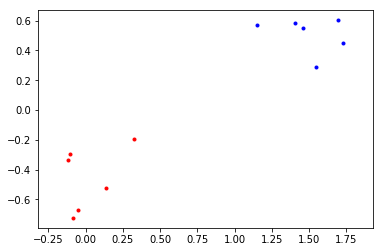

In [19]:
plot_data()

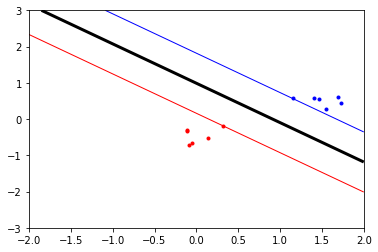

In [61]:
plot_db()

In [70]:
def non_zero_data():
    if C==0:
        non_zero_data_points = [
    (xi, target, alpha_value) for (xi, target, alpha_value) in zip(inputs, targets, alpha)
    if alpha_value > E_VALUE_THRESH
        ]
        
    else:
        non_zero_data_points = [
    (xi, target, alpha_value) for (xi, target, alpha_value) in zip(inputs, targets, alpha)
    if (alpha_value >= E_VALUE_THRESH) & (alpha_value <= C-E_VALUE_THRESH)
]
    return non_zero_data_points

        

In [64]:
def extract_nonzeros():
    if C==None:
        return [inputs[(alpha>10**(-5)),:], 
                targets[(alpha>10**(-5))], 
                alpha[(alpha>10**(-5))]]
    else:
        return [inputs[(alpha>10**(-5))&(alpha<C-10**(-5)),:], 
                targets[(alpha>10**(-5))&(alpha<C-10**(-5))], 
                alpha[(alpha>10**(-5))&(alpha<C-10**(-5))]]

In [65]:
#Generate data:
numpy.random.seed(100)
N, inputs, targets, classA, classB = generate_data(
                                [1.5, 0.5], [-1.5, 0.5], [0.0, -0.5], [0.5, 1.0],
                                rowsa_1=100, rowsb_1=100
                                                )

In [80]:
#Define and compute Kernel Function:
function = 'linear'
p=2
C=0.02
P = numpy.zeros( (N, N) )
P_ = compute_kernel_value()

#Apply minimize function:
start = numpy.zeros(N)
ret = minimize(objective, start, bounds = [(0, C) for b in range(N)],
               constraints = {'type':'eq', 'fun':zerofun})
alpha = ret['x']

sv = non_zero_data()

sv_2 = extract_nonzeros()


In [82]:
sv

[(array([ 0.10547383, -0.57486058]), -1.0, 0.01214689840296143),
 (array([1.65061244, 0.17811222]), 1.0, 0.003681536012212295),
 (array([1.58447604, 0.28119141]), 1.0, 0.00846536239078144)]

In [83]:
sv_2

[array([[ 0.10547383, -0.57486058],
        [ 1.65061244,  0.17811222],
        [ 1.58447604,  0.28119141]]),
 array([-1.,  1.,  1.]),
 array([0.0121469 , 0.00368154, 0.00846536])]

In [84]:
#Select any vector machine:

s = sv[0][0]
t_s = sv[0][-2]
print(s)
print(t_s)



s_2 = sv_2[0][0]
t_s_2 = sv_2[1][0]
print(s_2)
print(t_s_2)
b = sum(
    [
        alpha_value*target*kernel(xi, s, function, p)
        for  xi, target, alpha_value in  sv
    ] 
) - t_s

[ 0.10547383 -0.57486058]
-1.0
[ 0.10547383 -0.57486058]
-1.0


In [92]:
indicator(s)
print(b)

0.996161085943539


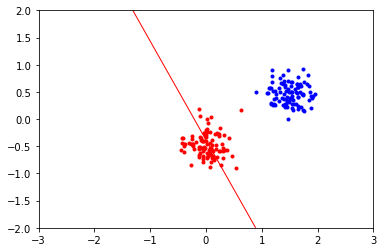

In [90]:
plot_db()

## C = 0.02

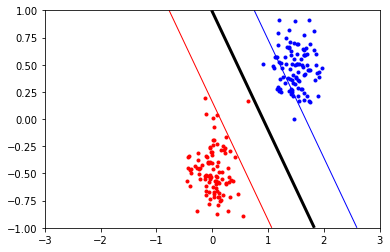

In [374]:
plot_db()

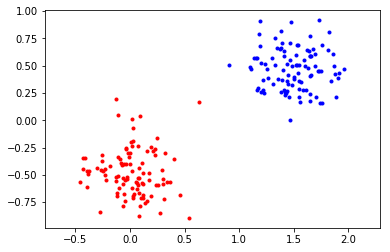

In [307]:
plot_data()

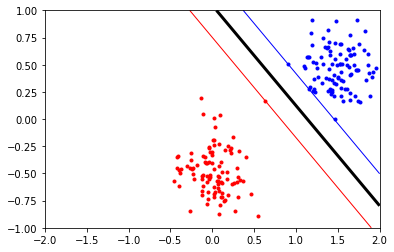

In [311]:
plot_db()

## C = 0.1

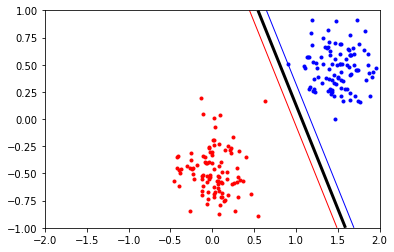

In [315]:
plot_db()

### Dataset 2:

In [174]:
#Generate data:
numpy.random.seed(100)
N, inputs, targets, classA, classB = generate_data(
                                [2.5, 0.5], [-1.5, 0.5], [1.3, 1.0],
                                rowsa_1=10, rowsa_2=10, rowsb_1=20 
                                                )

In [ ]:
function = 'polynomian'

In [178]:
#Define and compute Kernel Function:
function = 'polynomial'
p=2
P = numpy.zeros( (N, N) )
P_ = compute_kernel_value()

#Apply minimize function:
start = numpy.zeros(N)
ret = minimize(objective, start, bounds = [(0, None) for b in range(N)], 
               constraints = {'type':'eq', 'fun':zerofun})
alpha = ret['x']

#Remove non vector machine datapoints:
E_VALUE_THRESH = 1e-5
non_zero_data_points = [
    (xi, target, alpha_value) for (xi, target, alpha_value) in zip(inputs, targets, alpha)
    if alpha_value >= E_VALUE_THRESH
]

#Select any vector machine:

s = non_zero_data_points[1][0]
t_s = non_zero_data_points[1][-2]

b = sum(
    [
        alpha_value*target*kernel(xi, s, function, p)
        for  xi, target, alpha_value in  non_zero_data_points
    ] 
) - t_s

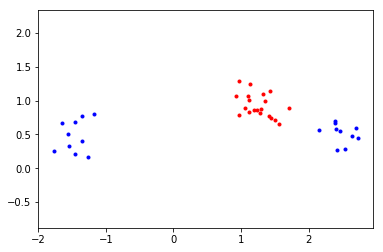

In [176]:
plot_data()

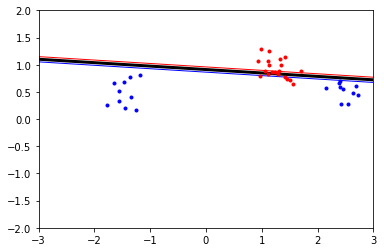

In [177]:
plot_db()

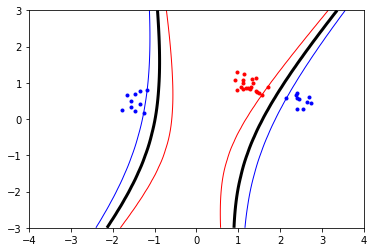

In [182]:
plot_db()

In [234]:
#Generate data:
numpy.random.seed(100)
N, inputs, targets, classA, classB = generate_data(
                                [1.5, 0.5], [-1.5, 0.5], [0.0, -0.5], [0.5, 1.0],
                                rowsa_1=10, rowsa_2=10, rowsb_1=10, rowsb_2=10
                                                )

In [247]:
#Define and compute Kernel Function:
function = 'polynomial'
p=10
P = numpy.zeros( (N, N) )
P_ = compute_kernel_value()

#Apply minimize function:
start = numpy.zeros(N)
ret = minimize(objective, start, bounds=[(0,C) for b in range(N)],
               constraints = {'type':'eq', 'fun':zerofun})
alpha = ret['x']

#Remove non vector machine datapoints:
E_VALUE_THRESH = 1e-5
non_zero_data_points = [
    (xi, target, alpha_value) for (xi, target, alpha_value) in zip(inputs, targets, alpha)
    if alpha_value >= E_VALUE_THRESH
]

#Select any vector machine:

s = non_zero_data_points[1][0]
t_s = non_zero_data_points[1][-2]

b = sum(
    [
        alpha_value*target*kernel(xi, s, function, p)
        for  xi, target, alpha_value in  non_zero_data_points
    ] 
) - t_s

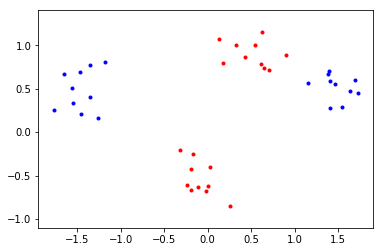

In [235]:
plot_data()

## P = 2

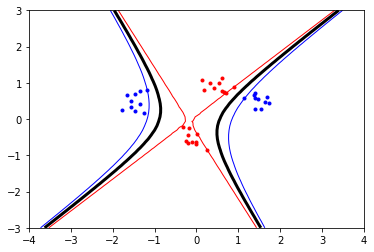

In [203]:
plot_db()

## P = 4

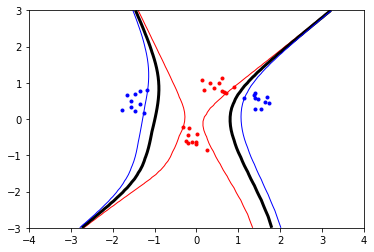

In [208]:
plot_db()

## P = 10

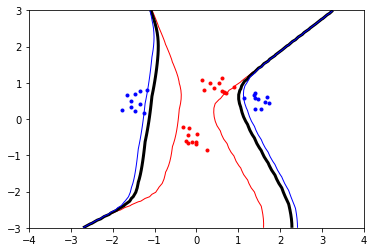

In [250]:
plot_db()

## $\sigma^2$ = 0.1

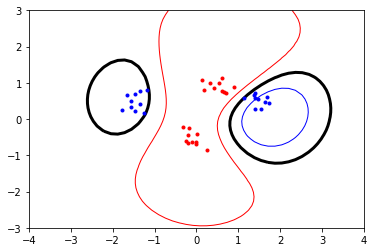

In [216]:
plot_db()

## $\sigma^2$ = 1

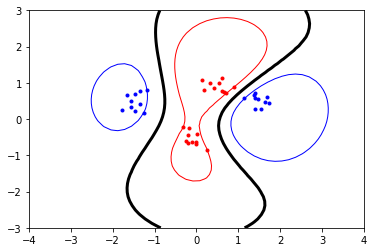

In [201]:
plot_db()

## $\sigma^2$ = 2

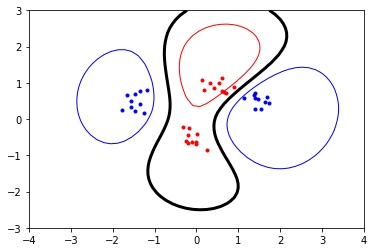

In [212]:
plot_db()

## $\sigma^2$ = 20

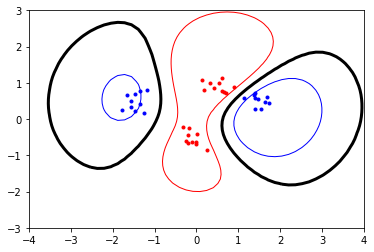

In [219]:
plot_db()